In [96]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Linearisation of R-P equation
$$
\omega^2  - j\omega \frac{4\mu_L}{\rho_L R_0^2} +  \frac{1}{\rho_L R_0^2} \left(
  ( \frac{2\sigma}{R_0} - {3kp_{G,0}}) \right)
  =
  - \frac{p_\infty}{\rho_L R_0^2 \epsilon_0} e^{-j\phi}
$$


$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$

$$
\phi = - arctan {
            \bigg( \frac{ \omega^2 - \omega_0^2}{ ( \omega \frac{4\mu_L}{\rho_L R_0^2}  )} \bigg)
                 } - \frac{\pi}{2}
$$

$$
\epsilon_0 = \frac{p_A}{\rho_L R_0^2}
  \frac{1}{\sqrt{\left(  (\omega^2 - \omega_0^2)^2 + (\omega \frac{4\mu_L}{\rho_L R_0^2} )^2        \right)}}
$$

## Non Dimensional numbers

(1) Acoustic pressure to ambient pressure ratio
$$
    p^* = \frac{p_A}{p_{\infty,0}}
$$
(2) Weber Number
$$
    w^* = \frac{p_{\infty,0} R_0}{2\sigma}
$$
(3) square of sound walength to radius ratio
$$
 l^{*} = \frac{1}{\gamma} \left( \frac{\lambda_L}{R_0} \right)^2 = \frac{p_{\infty,0}}{\rho_L R_0^2 \omega^2}
$$
(4) Ratio of natural frequency to driving frequency ratio
$$
    \omega^* = \frac{\omega_0}{\omega} = \sqrt{l^* \left( 3k (1+\frac{1}{w^*})  - \frac{1}{w^*}\right) }
$$
(5) Viscous Damping coefficient
$$
    \zeta^* = \frac{\beta_{\mu}}{\omega_0} = \frac{2\mu_L}{\rho_L R_0^2 \omega_0}
$$
## Bubble response
which gives for an external pressure field with an acoustic pressure pertubration
$$
    p_{\infty}(t) = p_{\infty,0} \left( 1 + p^* Re \{ e^{j\omega t}\} \right)
$$
The bubble responds as
$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$
where 
$$
\phi = - arctan {
            \bigg( \frac{ 1 - {\omega^*}^2 }{ ( 2\zeta^* \omega^* )} \bigg)
                 } - \frac{\pi}{2}
$$
and 
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* \omega^* )}^2        \right)}}
$$


In [97]:
#Liquid properties
rho = 1e3
mu = 8.9e-4
#mu = 8.9e-8
sigma=0.072

#Ambient COnditions
p_atm = 1e5

#Polytropic coeff
gamma=1.33

Fixed these parameters fixed for air-water at ambient

$$p_{\infty,0} = 1\times 10^5 Pa$$,

$$\rho_L = 1\times 10^{3} kgm^{-3}$$,

$$\mu_L=8.9\times 10^{-4} Ns/m^{2}$$,

$$\sigma = 0.072 N/m$$,

$$\gamma = 1.33$$

These parameters are chosen

$$R_0 = 2\times 10^{-6} m $$

$$\frac{\omega_0}{\omega} = 1.2 $$

In [98]:
#initial Condition
R_0 = 2e-6
u_0 = 0

#frequency ratio
omegastar = 1.2

#Polytropic coeff
k=gamma

#acoustic pressure ratio
pstar = 0.01

In [99]:
#NOn dimensional numbers
def parameters(omegastar, R_0, k, pstar):
    #weber number
    wstar = p_atm/(2*sigma/R_0)
    #Natural Frequency
    omega0 = np.sqrt(p_atm/(rho*R_0**2))*np.sqrt( 3*k*(1+1/wstar) - 1/wstar );
    omega = omega0/omegastar
    lstar = p_atm/(rho* R_0**2 * omega**2);
    zetastar = 2*mu/(rho* R_0**2 * omega);
    return [pstar, wstar, lstar, omegastar, zetastar, omega0]    

In [100]:
#Amplitude and phase
def cosineparameters(pstar, wstar, lstar, ostar, zetastar):
    phi = -np.arctan2(1-omegastar**2, 2*zetastar)-0.5*np.pi
    eps = pstar*lstar/np.sqrt( ( 1-omegastar**2 )**2 +  ( 2*zetastar )**2);
    return [phi, eps]

#Amplitude and phase
def cosineparameters2(pstar, wstar, lstar, ostar, zetastar):
    return omegastar**2/np.sqrt( ( 1-omegastar**2 )**2 +  ( 2*zetastar )**2);

In [101]:
def cosine(A, PHI, OMEGA, T):
    return A*np.cos(OMEGA*T+PHI)

In [102]:
#check the non-dim numbers
(pstar, wstar, lstar, omegastar, zetastar, omega0) = parameters (omegastar, R_0, gamma, pstar) 
parameters (omegastar, R_0, gamma, pstar) 

[0.01,
 1.3888888888888888,
 0.23442078530963067,
 1.2,
 0.043091148051979125,
 12392336.341465238]

In [103]:
(phi, eps) = cosineparameters(pstar, wstar, lstar, omegastar, zetastar)
cosineparameters(pstar, wstar, lstar, omegastar, zetastar)

[-0.19342016750339086, 0.005228396333483668]

## Bubble response using Linear Response analysis

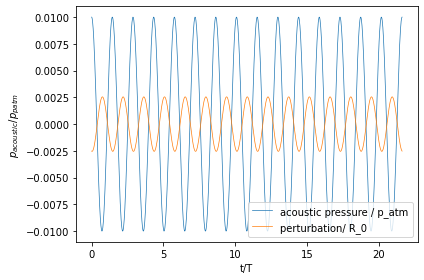

In [74]:
#plot p_infty(t) vs t
tsample = np.arange(0, 30*np.pi*omegastar/omega0, 30*np.pi*omegastar/(omega0*1000))
psample = cosine(pstar, 0., omega0/omegastar, tsample)
perturbation = -cosine(eps, phi, omega0/omegastar, tsample)
fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$p_{acoustic}$/$p_{patm}$")
ax1.plot(tsample/(2*np.pi/(omega0*omegastar)), psample, linewidth = 0.7, label = "acoustic pressure / p_atm")
ax1.plot(tsample/(2*np.pi/(omega0*omegastar)), perturbation, linewidth = 0.7, label = "perturbation/ R_0")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## (Some more) Non dimensional numbers
(6) Non-dim time
    $$
        t^* = {t}{\omega}
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       U^{*} =  \frac{dR^*}{dt} = \frac{1}{R_0 \omega} \frac{dR}{dt}
    $$
 We alse have
    $$
       \frac{U^{*}}{dt^*} =  \frac{1}{R_0 \omega^2} \frac{d^2 R}{dt^2}
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + 2\zeta^* \omega^* \frac{U^*}{R^*} + \frac{l^*}{w^*} \frac{1}{R^*} =
    l^* (1+\frac{1}{w^*}) (\frac{1}{R^*})^{3k} - l^* (1+p^* Re\{ e^{j t^*}\} )
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left( 
    l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k} -l^* \left( 1 + p^* cos(t^*) \right) - 
    \frac{3}{2} {U^*}^2 - 2\zeta^* \omega^* \frac{U^*}{R^*} - \frac{l^*}{w^*} \frac{1}{R^*}
\right)
\end{bmatrix}
$$

In the above equation
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_G(t) = l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k}$$
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_\infty (t) = l^* \left( 1 + p^*  cos(t^*)  \right)$$


## Integration of R-P (Non-dim)

In [75]:
def p_infty (tstar):
    return lstar * (1 + pstar*np.cos(tstar))

#def dpinfty_dt(t):
#    return (-p_a*(omega*np.cos(omega*t) + (3*(t-t0)/t0**2)*np.sin(omega*t))*np.exp(-1.5*(t-t0)**2/(t0**2)));

#partial pressure of air as a function of R
def p_gas(Rstar, k):
    return lstar*(1+1/wstar)*np.power(Rstar, -3*k)

#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( p_gas(Rstar, k) - p_infty(tstar) - 1.5*Ustar**2 
                     - 2*zetastar*omegastar*Ustar/Rstar-lstar/(wstar*Rstar) )/Rstar
    return (Ustar, dfdt)

## Compare bubble response (RP vs Linear Stability Analaysis)

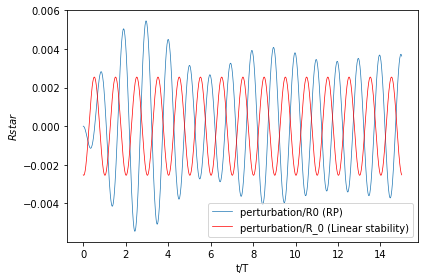

In [76]:
tstarsample = (omega0/omegastar)*tsample
R_RP = odeint(RP, [1, 0], tstarsample)
Ustarsample = R_RP[:,1]
Rstarsample = R_RP[:,0]

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$Rstar$")
ax1.plot(tstarsample/(2*np.pi), Rstarsample-1, linewidth = 0.7, label = "perturbation/R0 (RP)")
ax1.plot(tstarsample/(2*np.pi), perturbation, linewidth = 0.7, label = "perturbation/R_0 (Linear stability)", color= 'red')

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


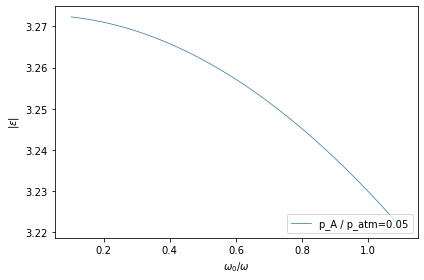

In [104]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$\omega_0/\omega$")
ax1.set_ylabel("$|\epsilon|$")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            eps = cosineparameters2(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)
        _label = "p_A / p_atm="+str(pstar)
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)

#omega_space=np.ones(1000)+0.001*np.array(range(1000))
omega_space=1.1*np.ones(1000)-0.001*np.array(range(1000))

init_parametric_space(omega_space,[0.05])
#init_parametric_space([0.01,0.05,0.1,0.2,0.25,0.33,0.5,1,1.2,1.4, 1.6, 2],[0.5])


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


In [93]:
np.ones(1000)+0.001*np.array(range(1000))

array([1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008,
       1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, 1.017,
       1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024, 1.025, 1.026,
       1.027, 1.028, 1.029, 1.03 , 1.031, 1.032, 1.033, 1.034, 1.035,
       1.036, 1.037, 1.038, 1.039, 1.04 , 1.041, 1.042, 1.043, 1.044,
       1.045, 1.046, 1.047, 1.048, 1.049, 1.05 , 1.051, 1.052, 1.053,
       1.054, 1.055, 1.056, 1.057, 1.058, 1.059, 1.06 , 1.061, 1.062,
       1.063, 1.064, 1.065, 1.066, 1.067, 1.068, 1.069, 1.07 , 1.071,
       1.072, 1.073, 1.074, 1.075, 1.076, 1.077, 1.078, 1.079, 1.08 ,
       1.081, 1.082, 1.083, 1.084, 1.085, 1.086, 1.087, 1.088, 1.089,
       1.09 , 1.091, 1.092, 1.093, 1.094, 1.095, 1.096, 1.097, 1.098,
       1.099, 1.1  , 1.101, 1.102, 1.103, 1.104, 1.105, 1.106, 1.107,
       1.108, 1.109, 1.11 , 1.111, 1.112, 1.113, 1.114, 1.115, 1.116,
       1.117, 1.118, 1.119, 1.12 , 1.121, 1.122, 1.123, 1.124, 1.125,
       1.126, 1.127,